In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import datetime

In [39]:
X = np.load('X_metrics.npy')
y = np.load('y_metrics.npy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [4]:
actions = np.array(['Alerta de Caida',
                        'Normal',
                        'Normal2',
                        'Sentandose',
                        'Levantandose',
                        'Sentado',
                        'Caminando'])

In [59]:
from tensorflow.keras.layers import Dropout,BatchNormalization, Flatten, Conv1D, MaxPooling1D

In [5]:
def SYSU(action):
    input_shape = (X_train.shape[1], X_train.shape[2])
    input_layer = tf.keras.layers.Input(shape=input_shape)
    x = LSTM(100, return_sequences=True, activation='tanh')(input_layer)
    x = Dropout(0.5)(x)
    x = LSTM(100, return_sequences=True, activation='tanh')(x)
    x = Dropout(0.5)(x)
    x = LSTM(100, return_sequences=False, activation='tanh')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(len(action), activation='softmax')(x)
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    return model



In [8]:
ModelSYSU = SYSU(actions)
ModelSYSU.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 30, 132)]         0         
                                                                 
 lstm_6 (LSTM)               (None, 30, 100)           93200     
                                                                 
 dropout_6 (Dropout)         (None, 30, 100)           0         
                                                                 
 lstm_7 (LSTM)               (None, 30, 100)           80400     
                                                                 
 dropout_7 (Dropout)         (None, 30, 100)           0         
                                                                 
 lstm_8 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0   

In [11]:
learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.96
)

# Create an optimizer with the learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule)

In [13]:
ModelSYSU.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [32]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience = 30,  restore_best_weights = True)

In [16]:
history = ModelSYSU.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=2000, callbacks=[early_stopping_monitor], batch_size=64)

Epoch 1/2000
2/2 [==============================] - 14s 2s/step - loss: 1.9602 - categorical_accuracy: 0.1339 - val_loss: 1.9175 - val_categorical_accuracy: 0.2069
Epoch 2/2000
2/2 [==============================] - 0s 216ms/step - loss: 1.9317 - categorical_accuracy: 0.2679 - val_loss: 1.9104 - val_categorical_accuracy: 0.3103
Epoch 3/2000
2/2 [==============================] - 0s 175ms/step - loss: 1.9181 - categorical_accuracy: 0.2321 - val_loss: 1.9006 - val_categorical_accuracy: 0.3103
Epoch 4/2000
2/2 [==============================] - 0s 159ms/step - loss: 1.8697 - categorical_accuracy: 0.2500 - val_loss: 1.8474 - val_categorical_accuracy: 0.4138
Epoch 5/2000
2/2 [==============================] - 0s 161ms/step - loss: 1.8229 - categorical_accuracy: 0.3125 - val_loss: 1.7859 - val_categorical_accuracy: 0.3448
Epoch 6/2000
2/2 [==============================] - 0s 158ms/step - loss: 1.7247 - categorical_accuracy: 0.3839 - val_loss: 1.6991 - val_categorical_accuracy: 0.3103
Epoch 

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


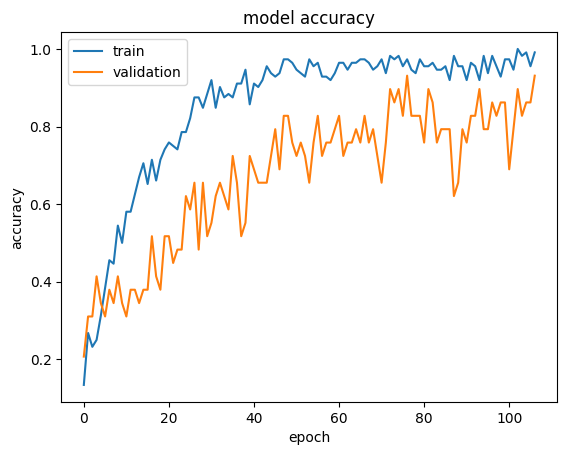

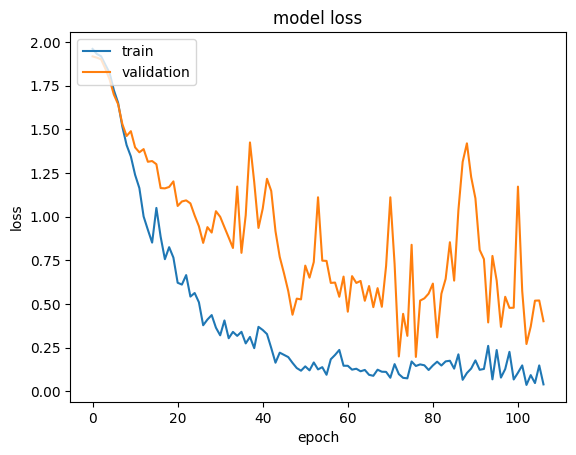

In [18]:
import matplotlib.pyplot as plt
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [21]:
res = ModelSYSU.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [23]:
import numpy as np

def threshold_vector(vector, threshold=0.5):
    return np.where(vector >= threshold, 1, 0)

binary_vector = threshold_vector(res)
binary_vector

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0]])

In [24]:
from sklearn.metrics import recall_score
from sklearn.preprocessing import label_binarize
pred = []
test = []
for i in res:
  pred.append(np.argmax(i))
for i in y_test:
  test.append(np.argmax(i))

print
print(pred)

print(test)

[3, 5, 1, 2, 4, 6, 4, 5, 6, 0, 1, 2, 0, 4, 5, 6, 1, 6, 0, 5, 3, 5, 5, 5, 3, 0, 2, 2, 4]
[3, 5, 1, 2, 4, 6, 4, 5, 6, 0, 1, 2, 0, 5, 5, 6, 1, 6, 0, 5, 3, 4, 5, 5, 3, 0, 2, 2, 4]


In [25]:
from sklearn.metrics import classification_report

recall =classification_report(test, pred, target_names= actions)
print(recall)

                 precision    recall  f1-score   support

Alerta de Caida       1.00      1.00      1.00         4
         Normal       1.00      1.00      1.00         3
        Normal2       1.00      1.00      1.00         4
     Sentandose       1.00      1.00      1.00         3
   Levantandose       0.75      0.75      0.75         4
        Sentado       0.86      0.86      0.86         7
      Caminando       1.00      1.00      1.00         4

       accuracy                           0.93        29
      macro avg       0.94      0.94      0.94        29
   weighted avg       0.93      0.93      0.93        29



In [26]:
ModelSYSU.evaluate(X_test, y_test)

1/1 [==============================] - 0s 51ms/step - loss: 0.1977 - categorical_accuracy: 0.9310


[0.19768154621124268, 0.931034505367279]

In [27]:
ModelSYSU.save('ModelSYSU.h5')

C:\Users\quirozdj\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
def SBU(action):
    input_shape = (X_train.shape[1], X_train.shape[2])
    input_layer = tf.keras.layers.Input(shape=input_shape)
    x = LSTM(50, return_sequences=True, activation='tanh')(input_layer)
    x = Dropout(0.5)(x)
    x = LSTM(50, return_sequences=True, activation='tanh')(x)
    x = Dropout(0.5)(x)
    x = LSTM(50, return_sequences=False, activation='tanh')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(len(action), activation='softmax')(x)
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    return model

In [41]:
modelSBU = SBU(actions)
modelSBU.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 30, 132)]         0         
                                                                 
 lstm_12 (LSTM)              (None, 30, 50)            36600     
                                                                 
 dropout_12 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_13 (LSTM)              (None, 30, 50)            20200     
                                                                 
 dropout_13 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_14 (Dropout)        (None, 50)                0   

In [42]:
learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.96
)

# Create an optimizer with the learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule)

In [43]:
modelSBU.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [44]:
history = modelSBU.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=2000, callbacks=[early_stopping_monitor], batch_size=64)

Epoch 1/2000
2/2 [==============================] - 12s 2s/step - loss: 1.9566 - categorical_accuracy: 0.1786 - val_loss: 1.9431 - val_categorical_accuracy: 0.1379
Epoch 2/2000
2/2 [==============================] - 0s 114ms/step - loss: 1.9322 - categorical_accuracy: 0.1786 - val_loss: 1.9391 - val_categorical_accuracy: 0.2069
Epoch 3/2000
2/2 [==============================] - 0s 95ms/step - loss: 1.9502 - categorical_accuracy: 0.2411 - val_loss: 1.9289 - val_categorical_accuracy: 0.1724
Epoch 4/2000
2/2 [==============================] - 0s 90ms/step - loss: 1.8872 - categorical_accuracy: 0.2857 - val_loss: 1.8936 - val_categorical_accuracy: 0.1379
Epoch 5/2000
2/2 [==============================] - 0s 92ms/step - loss: 1.8504 - categorical_accuracy: 0.3304 - val_loss: 1.8480 - val_categorical_accuracy: 0.2069
Epoch 6/2000
2/2 [==============================] - 0s 91ms/step - loss: 1.8092 - categorical_accuracy: 0.3304 - val_loss: 1.7862 - val_categorical_accuracy: 0.2759
Epoch 7/20

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


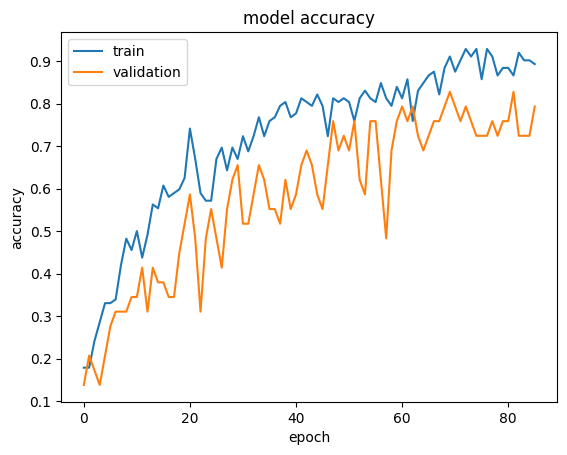

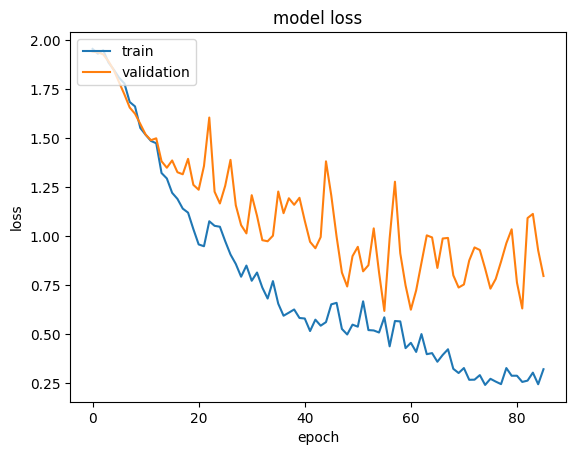

In [45]:
import matplotlib.pyplot as plt
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [52]:
res =modelSBU.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [54]:
import numpy as np

def threshold_vector(vector, threshold=0.5):
    return np.where(vector >= threshold, 1, 0)

binary_vector = threshold_vector(res)
binary_vector

array([[0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0]])

In [55]:
from sklearn.metrics import recall_score
from sklearn.preprocessing import label_binarize
pred = []
test = []
for i in res:
  pred.append(np.argmax(i))
for i in y_test:
  test.append(np.argmax(i))

print
print(pred)

print(test)

[4, 0, 5, 4, 0, 5, 1, 1, 6, 1, 2, 2, 0, 3, 2, 1, 3, 3, 6, 6, 4, 6, 6, 4, 4, 5, 4, 6, 1]
[4, 0, 4, 4, 3, 5, 1, 1, 6, 1, 2, 2, 0, 3, 2, 1, 3, 0, 6, 0, 5, 3, 6, 4, 3, 5, 4, 6, 1]


In [56]:
from sklearn.metrics import classification_report

recall =classification_report(test, pred, target_names= actions)
print(recall)

                 precision    recall  f1-score   support

Alerta de Caida       0.67      0.50      0.57         4
         Normal       1.00      1.00      1.00         5
        Normal2       1.00      1.00      1.00         3
     Sentandose       0.67      0.40      0.50         5
   Levantandose       0.67      0.80      0.73         5
        Sentado       0.67      0.67      0.67         3
      Caminando       0.67      1.00      0.80         4

       accuracy                           0.76        29
      macro avg       0.76      0.77      0.75        29
   weighted avg       0.76      0.76      0.75        29



In [57]:
modelSBU.evaluate(X_test, y_test)

1/1 [==============================] - 0s 44ms/step - loss: 0.6180 - categorical_accuracy: 0.7586


[0.6179680228233337, 0.7586206793785095]

In [58]:
modelSBU.save('modelSBU.h5')

C:\Users\quirozdj\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [60]:
def LSTM_PASL(action):
    input_shape = (X_train.shape[1], X_train.shape[2])
    input_layer = tf.keras.layers.Input(shape=input_shape)
    x = LSTM(256, return_sequences=True, activation='tanh')(input_layer)
    x = Dropout(0.2)(x)
    x = LSTM(128, return_sequences=True, activation='tanh')(x)
    x = Dropout(0.2)(x)
    x = Flatten()(x)
    output_layer = Dense(len(action), activation='softmax')(x)
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    return model

In [62]:
modelLSTM_PASL = LSTM_PASL(actions)
modelLSTM_PASL.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 30, 132)]         0         
                                                                 
 lstm_17 (LSTM)              (None, 30, 256)           398336    
                                                                 
 dropout_17 (Dropout)        (None, 30, 256)           0         
                                                                 
 lstm_18 (LSTM)              (None, 30, 128)           197120    
                                                                 
 dropout_18 (Dropout)        (None, 30, 128)           0         
                                                                 
 flatten_1 (Flatten)         (None, 3840)              0         
                                                                 
 dense_6 (Dense)             (None, 7)                 2688

In [63]:
learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.96
)

# Create an optimizer with the learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule)

In [64]:
early_stopping_monitor = EarlyStopping(patience = 30,  restore_best_weights = True)

In [65]:
modelLSTM_PASL.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [66]:
history = modelLSTM_PASL.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=2000, callbacks=[early_stopping_monitor], batch_size=64)

Epoch 1/2000
2/2 [==============================] - 9s 2s/step - loss: 2.0598 - categorical_accuracy: 0.1250 - val_loss: 1.8931 - val_categorical_accuracy: 0.1724
Epoch 2/2000
2/2 [==============================] - 0s 224ms/step - loss: 1.8694 - categorical_accuracy: 0.2500 - val_loss: 1.7912 - val_categorical_accuracy: 0.3103
Epoch 3/2000
2/2 [==============================] - 0s 201ms/step - loss: 1.7588 - categorical_accuracy: 0.2679 - val_loss: 1.6435 - val_categorical_accuracy: 0.4138
Epoch 4/2000
2/2 [==============================] - 0s 198ms/step - loss: 1.6132 - categorical_accuracy: 0.3929 - val_loss: 1.6777 - val_categorical_accuracy: 0.4828
Epoch 5/2000
2/2 [==============================] - 0s 212ms/step - loss: 1.4891 - categorical_accuracy: 0.5089 - val_loss: 1.4802 - val_categorical_accuracy: 0.2414
Epoch 6/2000
2/2 [==============================] - 0s 253ms/step - loss: 1.3245 - categorical_accuracy: 0.5089 - val_loss: 1.2797 - val_categorical_accuracy: 0.4828
Epoch 7

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


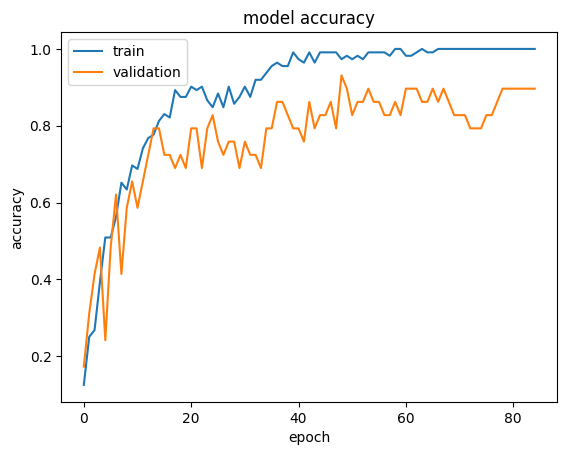

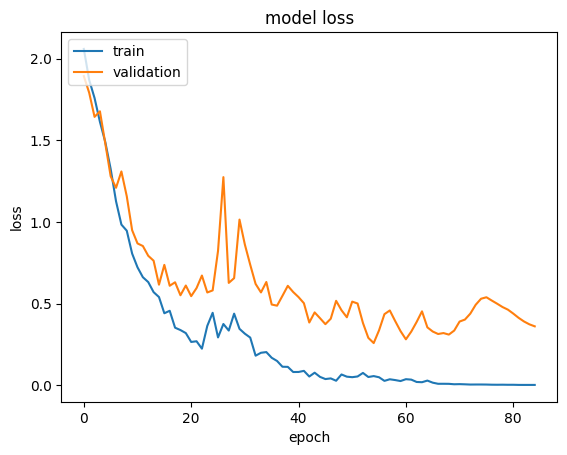

In [67]:
import matplotlib.pyplot as plt
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [68]:
res =modelLSTM_PASL.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [69]:
import numpy as np

def threshold_vector(vector, threshold=0.5):
    return np.where(vector >= threshold, 1, 0)

binary_vector = threshold_vector(res)
binary_vector

array([[0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0]])

In [70]:
from sklearn.metrics import recall_score
from sklearn.preprocessing import label_binarize
pred = []
test = []
for i in res:
  pred.append(np.argmax(i))
for i in y_test:
  test.append(np.argmax(i))

print
print(pred)

print(test)

[4, 4, 4, 3, 0, 5, 1, 1, 6, 1, 2, 2, 0, 3, 2, 1, 3, 2, 6, 0, 5, 3, 6, 4, 3, 5, 4, 6, 1]
[4, 0, 4, 4, 3, 5, 1, 1, 6, 1, 2, 2, 0, 3, 2, 1, 3, 0, 6, 0, 5, 3, 6, 4, 3, 5, 4, 6, 1]


In [71]:
from sklearn.metrics import classification_report

recall =classification_report(test, pred, target_names= actions)
print(recall)

                 precision    recall  f1-score   support

Alerta de Caida       0.67      0.50      0.57         4
         Normal       1.00      1.00      1.00         5
        Normal2       0.75      1.00      0.86         3
     Sentandose       0.80      0.80      0.80         5
   Levantandose       0.80      0.80      0.80         5
        Sentado       1.00      1.00      1.00         3
      Caminando       1.00      1.00      1.00         4

       accuracy                           0.86        29
      macro avg       0.86      0.87      0.86        29
   weighted avg       0.86      0.86      0.86        29



In [72]:
modelLSTM_PASL.evaluate(X_test, y_test)

1/1 [==============================] - 0s 74ms/step - loss: 0.2576 - categorical_accuracy: 0.8621


[0.2575645446777344, 0.8620689511299133]

In [73]:
modelLSTM_PASL.save('modelLSTM_PASL.h5')

C:\Users\quirozdj\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
